In [1]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from datetime import datetime
from scipy.stats import linregress

#By Veera
# Files to Load
file1_to_load = "Resources/us_states.csv"
file2_to_load = "Resources/Anxiety_data.csv"

# Read CSV Files and store into Pandas data frames
covid_data = pd.read_csv(file1_to_load)
anxiety_data = pd.read_csv(file2_to_load)

#Display DataFrames for Covid and Anxiety data
display('Covid Data:', covid_data.head())
display('Anxiety Data:',anxiety_data.head())


'Covid Data:'

,date,state,fips,cases,deaths
0,1/21/2020,Washington,53,1,0
1,1/22/2020,Washington,53,1,0
2,1/23/2020,Washington,53,1,0
3,1/24/2020,Illinois,17,1,0
4,1/24/2020,Washington,53,1,0


'Anxiety Data:'

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,23.2,21.5,25.0,21.5 - 25.0,NaN


In [2]:
#By Kim
del covid_data['fips']
covid_data

,date,state,cases,deaths
0,1/21/2020,Washington,1,0
1,1/22/2020,Washington,1,0
2,1/23/2020,Washington,1,0
3,1/24/2020,Illinois,1,0
4,1/24/2020,Washington,1,0
...,...,...,...,...
23054,4/25/2021,Virginia,654210,10691
23055,4/25/2021,Washington,397006,5478
23056,4/25/2021,West Virginia,151382,2821
23057,4/25/2021,Wisconsin,656668,7473


In [3]:
#By Kim
del anxiety_data['Group']
del anxiety_data['Subgroup']
del anxiety_data['Phase']
del anxiety_data['Time Period']
del anxiety_data['Time Period Label']
del anxiety_data['Time Period End Date']
del anxiety_data['Low CI']
del anxiety_data['High CI']
del anxiety_data['Confidence Interval']
del anxiety_data['Quartile Range']

#By Veera
#change the date format of anxiety_data to match covid_data's
anxiety_data['Time Period Start Date'] = anxiety_data['Time Period Start Date'].apply(lambda dateStr:dateStr.split()[0])

#change column names to assist merge and be meaningful
anxiety_data_renamed = anxiety_data.rename(columns={'State':'state',"Indicator":"mental disorder","Value":"frequency of mental disorder","Time Period Start Date":"date"})
anxiety_data_renamed

,mental disorder,state,date,frequency of mental disorder
0,Symptoms of Depressive Disorder,United States,4/23/2020,23.5
1,Symptoms of Depressive Disorder,United States,4/23/2020,32.7
2,Symptoms of Depressive Disorder,United States,4/23/2020,25.7
3,Symptoms of Depressive Disorder,United States,4/23/2020,24.8
4,Symptoms of Depressive Disorder,United States,4/23/2020,23.2
...,...,...,...,...
5779,Symptoms of Anxiety Disorder or Depressive Dis...,Virginia,3/17/2021,31.4
5780,Symptoms of Anxiety Disorder or Depressive Dis...,Washington,3/17/2021,35.6
5781,Symptoms of Anxiety Disorder or Depressive Dis...,West Virginia,3/17/2021,41.0
5782,Symptoms of Anxiety Disorder or Depressive Dis...,Wisconsin,3/17/2021,32.3


In [4]:
#By Kim
#merge data based on states
merged_data = covid_data.merge(anxiety_data_renamed,how="inner", on = ["state","date"])
#create csv data of merged
merged_data.to_csv("Resources/merged_data.csv")
#display merged data
display(merged_data)


,date,state,cases,deaths,mental disorder,frequency of mental disorder
0,4/23/2020,Alabama,5832,197,Symptoms of Depressive Disorder,18.6
1,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder,25.6
2,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder or Depressive Dis...,30.3
3,4/23/2020,Alaska,335,7,Symptoms of Depressive Disorder,19.2
4,4/23/2020,Alaska,335,7,Symptoms of Anxiety Disorder,27.7
...,...,...,...,...,...,...
4126,3/17/2021,Wisconsin,627266,7203,Symptoms of Anxiety Disorder,25.9
4127,3/17/2021,Wisconsin,627266,7203,Symptoms of Anxiety Disorder or Depressive Dis...,32.3
4128,3/17/2021,Wyoming,55449,693,Symptoms of Depressive Disorder,24.2
4129,3/17/2021,Wyoming,55449,693,Symptoms of Anxiety Disorder,30.1


In [5]:
# Data Analysis 
#By Rodney
# Frequency table by mental disorder
covid_tiny_group1 = merged_data.groupby("mental disorder")
covid_tiny_group1

# total number of cases, deaths, and frequency of mental disorder by mental disorder
total_cases_mental_disorder = covid_tiny_group1["cases"].mean().map("{:,.0f}".format)
total_deaths_mental_disorder = covid_tiny_group1["deaths"].mean().map("{:,.0f}".format)
total_frequency_mental_disorder = covid_tiny_group1["frequency of mental disorder"].mean().map("{:,.1f}".format)
total_cases_mental_disorder
total_deaths_mental_disorder
total_frequency_mental_disorder

# Display the results in a dataframe 
covid_tiny_group_mental_disorder_results = pd.DataFrame({"Average of Cases": total_cases_mental_disorder,"Average of Deaths":total_deaths_mental_disorder,
                                        "Average Frequency of Mental Disorder": total_frequency_mental_disorder})
covid_tiny_group_mental_disorder_results

,Average of Cases,Average of Deaths,Average Frequency of Mental Disorder
mental disorder,,,
Symptoms of Anxiety Disorder,"191,414","4,369",32.1
Symptoms of Anxiety Disorder or Depressive Disorder,"191,414","4,369",37.0
Symptoms of Depressive Disorder,"191,414","4,369",25.6


In [6]:
# create a new lists with cases, deaths, and frequency of mental disorder columns
cases_column = merged_data["cases"].to_list()
deaths_column = merged_data["deaths"].to_list()
frequency_column =merged_data["frequency of mental disorder"].to_list()

# tuple from the above lists
new_covid_tiny = list(zip(cases_column,deaths_column,frequency_column))

# create a new dataframe to describe the numerical variables
new_covid_tiny_df = pd.DataFrame(new_covid_tiny, columns=["cases", "deaths", "Frequency of Mental Disorder"])
round(new_covid_tiny_df.describe(),2)

,cases,deaths,Frequency of Mental Disorder
count,4131.00,4131.00,4131.00
mean,191414.42,4368.86,31.56
std,365537.50,7356.73,6.45
min,335.00,7.00,14.30
25%,15053.00,414.00,26.80
50%,60820.00,1512.00,31.50
75%,202182.00,5004.00,36.20
max,3631735.00,56952.00,52.30


,date,state,cases,deaths,mental disorder,frequency of mental disorder
30,4/23/2020,Georgia,20905,871,Symptoms of Depressive Disorder,25.6
31,4/23/2020,Georgia,20905,871,Symptoms of Anxiety Disorder,31.9
32,4/23/2020,Georgia,20905,871,Symptoms of Anxiety Disorder or Depressive Dis...,36.2
183,5/7/2020,Georgia,30524,1332,Symptoms of Depressive Disorder,25.6
184,5/7/2020,Georgia,30524,1332,Symptoms of Anxiety Disorder,29.5
...,...,...,...,...,...,...
3856,3/3/2021,Georgia,989698,17079,Symptoms of Anxiety Disorder,27.1
3857,3/3/2021,Georgia,989698,17079,Symptoms of Anxiety Disorder or Depressive Dis...,33.2
4008,3/17/2021,Georgia,1013340,17801,Symptoms of Depressive Disorder,25.1
4009,3/17/2021,Georgia,1013340,17801,Symptoms of Anxiety Disorder,34.0


,cases,deaths,frequency of mental disorder
date,,,
4/23/2020,20905,871,31.233333
5/7/2020,30524,1332,29.800000
5/14/2020,34422,1521,28.666667
5/21/2020,38969,1749,32.600000
5/28/2020,43363,1942,30.366667
6/4/2020,47528,2116,31.333333
6/11/2020,52332,2337,32.033333
6/18/2020,58040,2565,32.266667
6/25/2020,67796,2704,36.366667


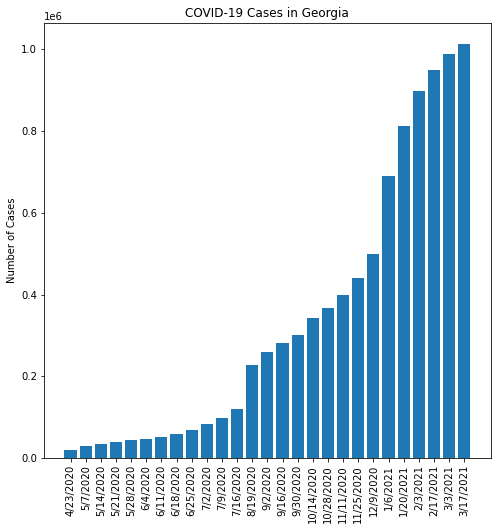

In [7]:
#By Jie Fang
#Question: How has Georgia been impacted?
#get georgia data
georgia_data=merged_data.loc[merged_data["state"]=="Georgia"]
#display georgia data
display(georgia_data)
#group georgia data by date
georgia_data_group_by_date=georgia_data.groupby(["date"],sort=False)
#get the mean
georgia_data_group_by_date_mean=georgia_data_group_by_date.mean()
#display mean data
display(georgia_data_group_by_date_mean)
#get the date array
date=georgia_data["date"].unique().tolist()
#assign data
a=date
b=georgia_data_group_by_date_mean["cases"]
c=georgia_data_group_by_date_mean["deaths"]
d=georgia_data_group_by_date_mean["frequency of mental disorder"]
#set the figure size
plt.figure(figsize=(8,8))
#plot the bar figure of COVID-19 cases in Georgia
plt.bar(a,b)
plt.xticks(rotation=90)
#set the title
plt.title("COVID-19 Cases in Georgia")
#set the y label
plt.ylabel("Number of Cases")
#save the png image
plt.savefig("Images/COVID-19 Cases in Georgia")

The r value is 0.04.


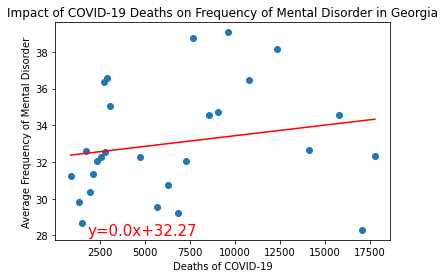

In [8]:
#By Jie Fang
#scatter plot COVID-19 deaths and frequency of mental disorder
plt.scatter(c,d)
#line regression model
(slope,intercept,rvalue,pvalue,stderr)=linregress(c,d)
regress_values=c*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.plot(c,regress_values,"r-")
plt.annotate(line_eq,(1800,28),fontsize=15,color="red")
#set the title
plt.title("Impact of COVID-19 Deaths on Frequency of Mental Disorder in Georgia")
#set the x label
plt.xlabel("Deaths of COVID-19")
#set the y label
plt.ylabel("Average Frequency of Mental Disorder")
#print the r value
print(f"The r value is {round(rvalue**2,2)}.")
#save the png image
plt.savefig("Images/Impact of COVID-19 Deaths on Frequency of Mental Disorder in Georgia")

In [9]:
summary_stats_df.reset_index(inplace=True)

NameError: name 'summary_stats_df' is not defined

In [10]:
sample_df = summary_stats_df.sample(n=10, random_state=2)
print(sample_df)
x_axis=summary_stats_df["state"]
y_axis=summary_stats_df["Cases"]
plt.bar(x_axis,y_axis)
plt.tight_layout()
plt.title("Covid 19: States vs. Cases")
plt.xlabel("States")
plt.ylabel("Cases")
plt.show()

NameError: name 'summary_stats_df' is not defined

In [11]:
#By Felix
sample_df = summary_stats_df.sample(n=10, random_state=2)
x_axis=summary_stats_df["state"]
y_axis=summary_stats_df["Deaths"]
plt.bar(x_axis,y_axis)
plt.tight_layout()
plt.title("Covid 19: States vs. Cases")
plt.xlabel("States")
plt.ylabel("Deaths")
plt.show()

NameError: name 'summary_stats_df' is not defined

In [12]:
# There is a high correlation in the number of Covid 19 Cases to the number of Deaths. This means that there is a direct
# impact to the number of deaths as a result of Covid 19 infection cases.
# Based on the data, we can claim that there is a positive correlation between Cases vs. Deaths
# Further analysis will help to determine if there is covid impact/affect on anxiety (mental health).

In [13]:
#By Kim
#Added new colum for month to calculate average frequency by month
merged_data["date_new"]=pd.to_datetime(merged_data["date"], format='%m/%d/%Y')
merged_data["month"]=pd.DatetimeIndex(merged_data["date_new"]).month
display(merged_data)

,date,state,cases,deaths,mental disorder,frequency of mental disorder,date_new,month
0,4/23/2020,Alabama,5832,197,Symptoms of Depressive Disorder,18.6,2020-04-23,4
1,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder,25.6,2020-04-23,4
2,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder or Depressive Dis...,30.3,2020-04-23,4
3,4/23/2020,Alaska,335,7,Symptoms of Depressive Disorder,19.2,2020-04-23,4
4,4/23/2020,Alaska,335,7,Symptoms of Anxiety Disorder,27.7,2020-04-23,4
...,...,...,...,...,...,...,...,...
4126,3/17/2021,Wisconsin,627266,7203,Symptoms of Anxiety Disorder,25.9,2021-03-17,3
4127,3/17/2021,Wisconsin,627266,7203,Symptoms of Anxiety Disorder or Depressive Dis...,32.3,2021-03-17,3
4128,3/17/2021,Wyoming,55449,693,Symptoms of Depressive Disorder,24.2,2021-03-17,3
4129,3/17/2021,Wyoming,55449,693,Symptoms of Anxiety Disorder,30.1,2021-03-17,3


In [14]:
#Calculate average frequency per month
month_groupby = merged_data.groupby(['month'])
avg_anx_month = month_groupby['frequency of mental disorder'].mean()
monthly_df = pd.DataFrame({"average frequency by month": avg_anx_month})
display(monthly_df) 

,average frequency by month
month,
1,34.342157
2,32.553595
3,30.043464
4,28.807190
5,28.411275
6,30.277614
7,33.571678
8,29.809804
9,30.486057


In [15]:
#Create data frame for monthly average US anxiety 
US_Anxiety_bymonth_df = pd.DataFrame({
    "Months" : ["April 2020", "May", "Jun", "July", "August", "September", "October", "November", "December", "January 2021", "February 2021", "March 2021"],
    "Frequency of mental disorder" :[34.34, 32.55, 30.04, 28.81, 28.41, 30.28, 33.57, 29.81, 30.49, 33.14, 35.36, 35.79]
})
display(US_Anxiety_bymonth_df)

,Months,Frequency of mental disorder
0,April 2020,34.34
1,May,32.55
2,Jun,30.04
3,July,28.81
4,August,28.41
5,September,30.28
6,October,33.57
7,November,29.81
8,December,30.49
9,January 2021,33.14


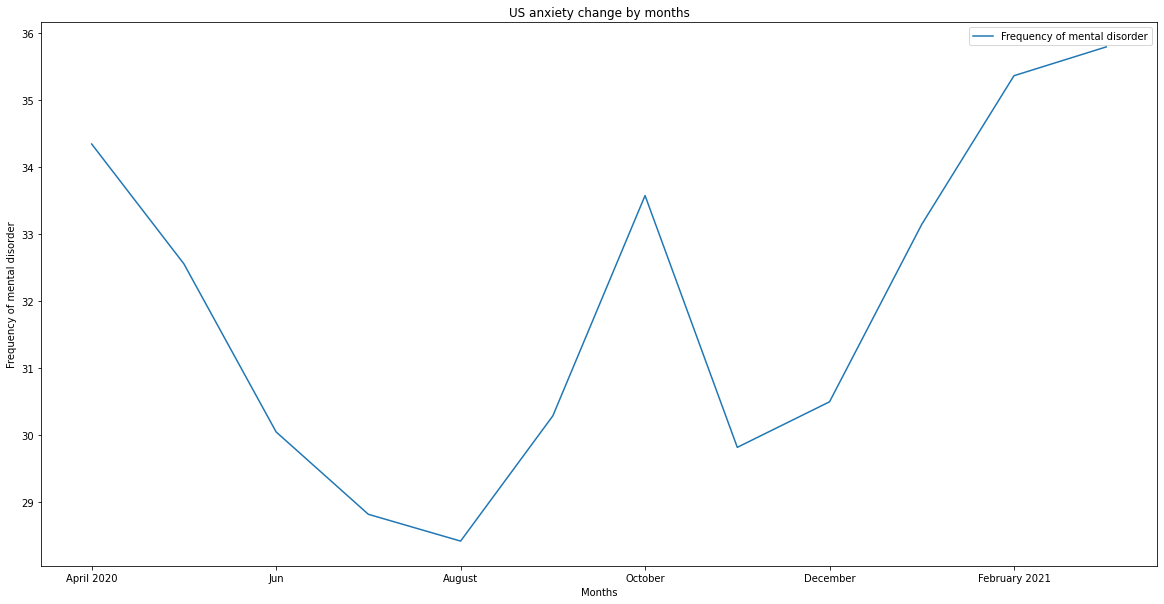

In [16]:
#Create chart for US anxiety change by months
chart_anx = pd.DataFrame(US_Anxiety_bymonth_df.groupby(["Months"]).count()).reset_index()
chart_anx_df = US_Anxiety_bymonth_df[["Months", "Frequency of mental disorder"]]
chart_anx_df = chart_anx_df.set_index("Months")

chart_anx_df.plot(kind="line", figsize=(20,10))
plt.title("US anxiety change by months")
plt.ylabel("Frequency of mental disorder")
plt.savefig('Images/US anxiety change by month.png')
plt.show()

In [17]:
#By Veera


In [18]:
#By Riley
anx_data = merged_data
depression_df = anx_data[anx_data['mental disorder']=='Symptoms of Depressive Disorder']
anxiety_df = anx_data[anx_data['mental disorder']== 'Symptoms of Anxiety Disorder']
either_df = anx_data[anx_data['mental disorder']== 'Symptoms of Anxiety Disorder or Depressive Disorder']

depression = depression_df.groupby('state').mean()['frequency of mental disorder']
anxiety = anxiety_df.groupby('state').mean()['frequency of mental disorder']
either = either_df.groupby('state').mean()['frequency of mental disorder']
both = (depression+anxiety)-either

In [19]:
mean_cases = anx_data.groupby('state').mean()["cases"]
mean_deaths = anx_data.groupby('state').mean()["deaths"]
mean_mental_disorder=anx_data.groupby('state').mean()["frequency of mental disorder"]
mean_mental_disorder

summary_stats_df = pd.DataFrame({"Cases": mean_cases, "Deaths":mean_deaths, "Anxiety":anxiety, "Depression":depression,
                                "Either Disorder":either, "Both Disorders":both})
summary_stats_df.head()

,Cases,Deaths,Anxiety,Depression,Either Disorder,Both Disorders
state,,,,,,
Alabama,1.739869e+05,3081.555556,32.307407,27.696296,37.485185,22.518519
Alaska,1.789378e+04,86.259259,31.914815,25.685185,37.314815,20.285185
Arizona,2.708545e+05,5512.000000,33.581481,27.933333,38.966667,22.548148
Arkansas,1.061795e+05,1719.148148,34.448148,28.896296,39.629630,23.714815
California,1.112002e+06,17291.148148,35.185185,28.518519,40.777778,22.925926


In [20]:
print('The total number of cases is '+str(round(summary_stats_df['Cases'].sum(),0))+'.')
print('The total number of deaths is '+str(round(summary_stats_df['Deaths'].sum(),0))+'.')
print('The average rate of anxiety is '+str(round(summary_stats_df['Anxiety'].mean(),2))+'.')
print('The averange rate of depression is '+str(round(summary_stats_df['Depression'].mean(),2))+'.')
print('The average rate of anxiety or depression symptoms '+str(round(summary_stats_df['Either Disorder'].mean(),2))+'.')
print('The average rate for both anxiety and depression symptoms is '+str(round(summary_stats_df['Both Disorders'].mean(),2))+'.')


The total number of cases is 9762136.0.
The total number of deaths is 222812.0.
The average rate of anxiety is 32.08.
The averange rate of depression is 25.63.
The average rate of anxiety or depression symptoms 36.98.
The average rate for both anxiety and depression symptoms is 20.72.


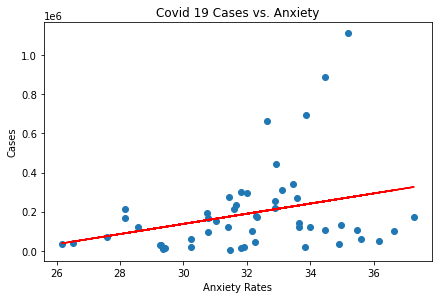

The r-value is: 0.08838834660185807


In [22]:
x_axis=summary_stats_df["Anxiety"]
y_axis=summary_stats_df["Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title("Covid 19 Cases vs. Anxiety")
plt.xlabel("Anxiety Rates")
plt.ylabel("Cases")
plt.show()
print(f"The r-value is: {rvalue**2}")

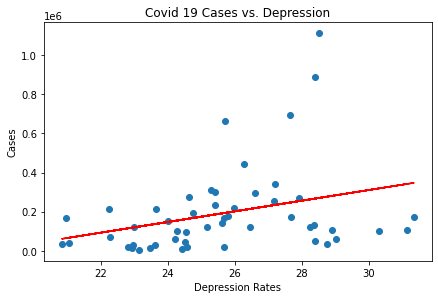

The r-value is: 0.09828985333616586


In [23]:
x_axis=summary_stats_df["Depression"]
y_axis=summary_stats_df["Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title("Covid 19 Cases vs. Depression")
plt.xlabel("Depression Rates")
plt.ylabel("Cases")
plt.show()
print(f"The r-value is: {rvalue**2}")

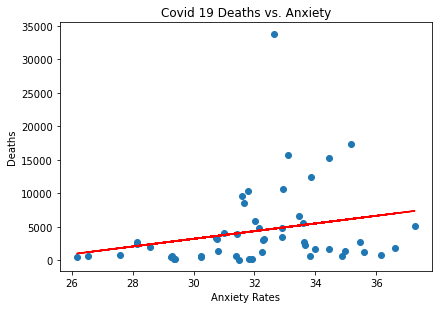

The r-value is: 0.058543384108705694


In [24]:
x_axis=summary_stats_df["Anxiety"]
y_axis=summary_stats_df["Deaths"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title("Covid 19 Deaths vs. Anxiety")
plt.xlabel("Anxiety Rates")
plt.ylabel("Deaths")
plt.show()
print(f"The r-value is: {rvalue**2}")

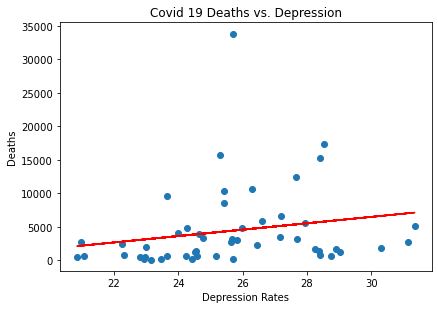

The r-value is: 0.04093693682134642


In [25]:
x_axis=summary_stats_df["Depression"]
y_axis=summary_stats_df["Deaths"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title("Covid 19 Deaths vs. Depression")
plt.xlabel("Depression Rates")
plt.ylabel("Deaths")
plt.show()
print(f"The r-value is: {rvalue**2}")

In [27]:
#Hypothesis Test
#By Riley
#In 2019, the CDC reported that about 18.5 percent of US adults expired symptoms of depression. We are
#using 18.5% as our null hypothesis to test whether the there has been a mathmatically significant change 
#in depression rates during the pandemic.

M_new=summary_stats_df['Depression'].mean()
M_old=18.5
stan_dev=summary_stats_df['Depression'].std()
n=summary_stats_df['Depression'].count()

print('Ho:' + str(round(M_new,2)) + '<=' + str(M_old))
print('H1:' + str(round(M_new,2)) + '>' + str(M_old))

significance_level = .05

z_score=(M_new-M_old)/(stan_dev)


print('The z-score equals '+str(round(z_score,3)))
print('The significance level equals '+str(significance_level))
p=sts.norm.cdf(z_score)
print('The p-value equals '+str(round(1-p,3)))
print('Because the p-value '+str(round(1-p,3))+ ' is less than the significance level, we have significant evidence to reject the null hypothesis.')
print('With this analysis, we can say with '+str(1-significance_level)+' confidence that depression rates for Americans have been higher during the pandemic.')

Ho:25.63<=18.5
H1:25.63>18.5
The z-score equals 2.795
The significance level equals 0.05
The p-value equals 0.003
Because the p-value 0.003 is less than the significance level, we have significant evidence to reject the null hypothesis.
With this analysis, we can say with 0.95 confidence that depression rates for Americans have been higher during the pandemic.
